# Del 8: Uvod v strojno učenje - Nadaljevanje

In [1]:
import pandas as pd
import numpy as np

## Instance Based Learning Vs. Model Based Learning




<p><img alt="KNN Complexity" src="images/knn_complexity.svg"></p>

<p><img alt="Model Based Learning" src="images/regression_complexity.png"></p>


## Linear Regression

### Introduction To The Data


<p>Here are some of the columns:</p>
<ul>
<li><code>Lot Area</code>: Lot size in square feet.</li>
<li><code>Overall Qual</code>: Rates the overall material and finish of the house.</li>
<li><code>Overall Cond</code>: Rates the overall condition of the house.</li>
<li><code>Year Built</code>: Original construction date.</li>
<li><code>Low Qual Fin SF</code>: Low quality finished square feet (all floors).</li>
<li><code>Full Bath</code>: Full bathrooms above grade.</li>
<li><code>Fireplaces</code>: Number of fireplaces.</li>
</ul>


In [2]:
import pandas as pd
data = pd.read_csv('data/AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
MS Zoning          1460 non-null object
Lot Frontage       1211 non-null float64
Lot Area           1460 non-null int64
Street             1460 non-null object
Alley              109 non-null object
Lot Shape          1460 non-null object
Land Contour       1460 non-null object
Utilities          1460 non-null object
Lot Config         1460 non-null object
Land Slope         1460 non-null object
Neighborhood       1460 non-null object
Condition 1        1460 non-null object
Condition 2        1460 non-null object
Bldg Type          1460 non-null object
House Style        1460 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Roof Style         14

In [3]:
data.head() # računamo SalePrice

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
# enačba premice: Y = a1x1+a0

### Simple Linear Regression


<p><img alt="Simple Linear Regression" src="images/simple_linear_regression.svg"></p>


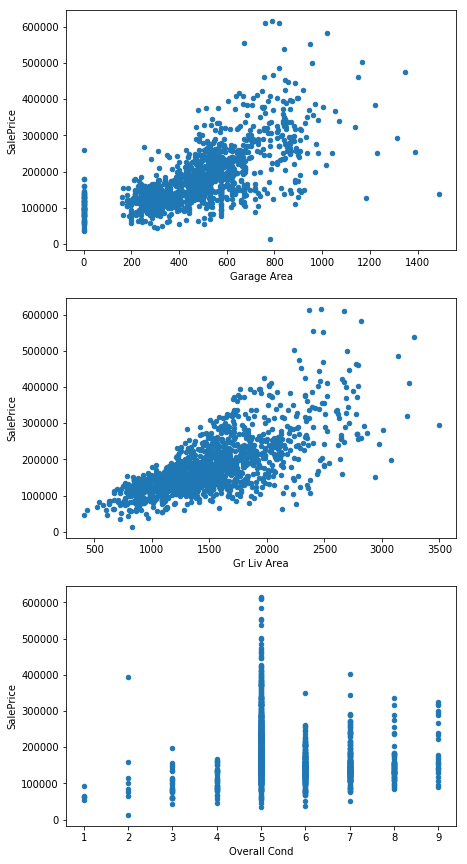

In [5]:
import matplotlib.pyplot as plt
# For prettier plots.
import seaborn
fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond", y="SalePrice", ax=ax3, kind="scatter")

plt.show() # v drugem grafu najboljša korelacija podatkov

### Using Scikit-Learn To Train And Predict

In [12]:
from sklearn.linear_model import LinearRegression #če imamo en atribut

lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])

print(lr.coef_)
print(lr.intercept_)



a0 = lr.intercept_
a1 = lr.coef_

[116.86624683]
5366.821710056014


In [18]:
import numpy as np

lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
from sklearn.metrics import mean_squared_error

train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])


In [19]:
train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

In [20]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

56034.3620014128
57088.25161263909


### Multiple Linear Regression

In [16]:
cols = ['Overall Cond', 'Gr Liv Area']

lr = LinearRegression()
lr.fit(train[cols])



In [17]:
train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, train['SalePrice']))
test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, test['SalePrice']))

NameError: name 'mean_squared_error' is not defined

In [21]:
print(train_rmse_2)
print(test_rmse_2)

NameError: name 'train_rmse_2' is not defined

### Missing Values

In [22]:
data = pd.read_csv('data/AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

In [23]:
numerical_train = train.select_dtypes(include=['int', 'float'])
numerical_train = numerical_train.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis=1)
null_series = numerical_train.isnull().sum()
print(null_series)

Order                0
MS SubClass          0
Lot Frontage       249
Lot Area             0
Overall Qual         0
Overall Cond         0
Mas Vnr Area        11
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       1
Bsmt Half Bath       1
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
SalePrice            0
dtype: int64


In [26]:
full_cols_series = null_series[null_series == 0]
full_cols_series

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64

### Correlating Feature Columns With Target Column

In [25]:
len(full_cols_series)

25

In [30]:
full_cols_series.index

Index(['Order', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice'],
      dtype='object')

In [31]:
train_subset = train[full_cols_series.index]

In [33]:
corrmat = train_subset.corr()

In [35]:
#corrmat --> poenostavimo

In [39]:
sorted_corrs = corrmat['SalePrice'].abs().sort_values()

In [40]:
sorted_corrs

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64

### Correlation Matrix Heatmap

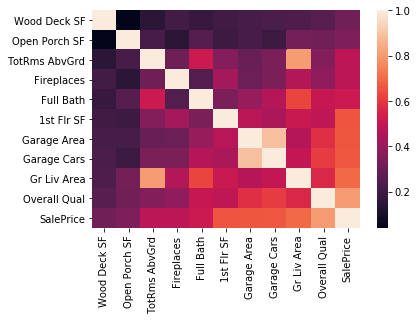

In [42]:
# vzamemo vrednosti 0,3 naprej
import seaborn as sns
import matplotlib.pyplot as plt

strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmat = train_subset[strong_corrs.index].corr()
sns.heatmap(corrmat)

plt.show() # gledamo drugo polovico

### Train And Test Model

In [43]:
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
test[final_corr_cols.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
Wood Deck SF     1470 non-null int64
Open Porch SF    1470 non-null int64
Fireplaces       1470 non-null int64
Full Bath        1470 non-null int64
1st Flr SF       1470 non-null int64
Garage Area      1469 non-null float64
Gr Liv Area      1470 non-null int64
Overall Qual     1470 non-null int64
SalePrice        1470 non-null int64
dtypes: float64(1), int64(8)
memory usage: 103.4 KB


In [44]:
features = final_corr_cols.drop(['SalePrice']).index
clean_test = test[final_corr_cols.index].dropna()
target  ='SalePrice'

In [46]:
lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

In [48]:
train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

In [49]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

34173.97629185852
41032.02612019769


### Removing Low Variance Features

In [52]:
#reskajlat spremenljivke med 0 in 1
unit_train = (train[features] - train[features].min()) / (train[features].max()-train[features].min())

In [53]:
print(unit_train.min())
print(unit_train.max())

Wood Deck SF     0.0
Open Porch SF    0.0
Fireplaces       0.0
Full Bath        0.0
1st Flr SF       0.0
Garage Area      0.0
Gr Liv Area      0.0
Overall Qual     0.0
dtype: float64
Wood Deck SF     1.0
Open Porch SF    1.0
Fireplaces       1.0
Full Bath        1.0
1st Flr SF       1.0
Garage Area      1.0
Gr Liv Area      1.0
Overall Qual     1.0
dtype: float64


In [54]:
sorted_vars = unit_train.var().sort_values()
print(sorted_vars) #  odstranimo še stolpce pod 0,1

Open Porch SF    0.013938
Full Bath        0.018621
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64


### Final Model

In [55]:
clean_test = test[final_corr_cols.index].dropna()
features = features.drop('Open Porch SF')

In [56]:
lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

In [58]:
train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

In [59]:
train_rmse_2 = np.sqrt(train_mse)
test_rmse_2 = np.sqrt(test_mse)

In [60]:
print(train_rmse_2)
print(test_rmse_2)

34372.696707783965
40591.427024377364


## Exercise: Predicting House Sale Prices


### Introduction

<img src="images/pipeline.svg">

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold

In [63]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")

In [65]:
df.dtypes.value_counts()

object     43
int64      28
float64    11
dtype: int64

In [66]:
len(df) # število vrstic

2930

In [67]:
def transform_features(df): # primer brez 0
    return df

In [68]:
# ni manjčajočih vrednosti
df['Gr Liv Area'].isnull().sum()

0

In [69]:
def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

In [76]:
def train_and_test(df, debug=False):  # debug=True, če potrebujemo stestirat, izpis vmesnih korakov
    train = df[:1460]
    test = df[1460:]
    
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    features = numeric_train.columns.drop("SalePrice") # to napovedujemo
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse #vrnemo napako

In [77]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, debug=True)

rmse

Selected features: ['Gr Liv Area']


57088.25161263909

### Feature Engineering # pomembno je razumevanje podatkov

[Dataset metadata](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

#### Missing Values

1: All columns: Drop any with 5% or more missing values for now.

In [81]:
num_missing = df.isnull().sum() 
num_missing

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

In [91]:
# Filter Series to columns containing >5% missing values
drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values() # 20 zaradi 5%

In [92]:
drop_missing_cols.index # 10 tolpcev bomo odvrgli

Index(['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley',
       'Misc Feature', 'Pool QC'],
      dtype='object')

In [93]:
# Drop those columns from the data frame. Note the use of the .index accessor
df = df.drop(drop_missing_cols.index, axis=1)

KeyError: "['Garage Type' 'Garage Yr Blt' 'Garage Finish' 'Garage Qual' 'Garage Cond'\n 'Lot Frontage' 'Fireplace Qu' 'Fence' 'Alley' 'Misc Feature' 'Pool QC'] not found in axis"

In [96]:
#df.isnull().sum()

2: Text columns: Drop any with 1 or more missing values for now.

In [98]:
df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

Bsmt Exposure     83
BsmtFin Type 2    81
BsmtFin Type 1    80
Bsmt Qual         80
Bsmt Cond         80
Mas Vnr Type      23
Electrical         1
Utilities          0
Lot Config         0
Land Slope         0
Roof Matl          0
Land Contour       0
Lot Shape          0
Street             0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Roof Style         0
Sale Condition     0
Exterior 1st       0
Exterior 2nd       0
Sale Type          0
Exter Qual         0
Exter Cond         0
Foundation         0
Heating            0
Heating QC         0
Central Air        0
Kitchen Qual       0
Functional         0
Paved Drive        0
MS Zoning          0
dtype: int64

In [99]:
## Series object: column name -> number of missing values
text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

In [100]:
## Filter Series to columns containing *any* missing values
drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]

In [101]:
drop_missing_cols_2

Bsmt Exposure     83
BsmtFin Type 2    81
BsmtFin Type 1    80
Bsmt Qual         80
Bsmt Cond         80
Mas Vnr Type      23
Electrical         1
dtype: int64

In [104]:
df = df.drop(drop_missing_cols_2.index, axis=1)

KeyError: "['Bsmt Exposure' 'BsmtFin Type 2' 'BsmtFin Type 1' 'Bsmt Qual' 'Bsmt Cond'\n 'Mas Vnr Type' 'Electrical'] not found in axis"

3: Numerical columns: For columns with missing values, fill in with the most common value in that column

In [105]:
## Compute column-wise missing value counts
num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
fixable_numeric_cols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [111]:
## Compute the most common value for each column in `fixable_nmeric_missing_cols`.
replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]

In [112]:
replacement_values_dict #moramo dopolniti stolpec -> dropna -> dictionary

{'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Bsmt Unf SF': 0.0,
 'Total Bsmt SF': 0.0,
 'Garage Cars': 2.0,
 'Garage Area': 0.0,
 'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Mas Vnr Area': 0.0}

In [114]:
## Use `pd.DataFrame.fillna()` to replace missing values.
df = df.fillna(replacement_values_dict)

In [115]:
## Verify that every column has 0 missing values
df.isnull().sum().value_counts()

0    64
dtype: int64

#### Transforming Improper Numerical Features

In [118]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")

In [119]:
df[['Year Remod/Add', 'Year Built']].head() # leto obnove stanovanja in kdaj je bilo zgrajeno

,Year Remod/Add,Year Built
0,1960,1960
1,1961,1961
2,1958,1958
3,1968,1968
4,1998,1997


In [120]:
years_sold = df['Yr Sold'] - df['Year Built']
years_sold[years_sold < 0] # -1 pomeni napako, moramo odstranit

2180   -1
dtype: int64

In [121]:
years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [122]:
## Create new columns
df['Years Before Sale'] = years_sold
df['Years Since Remod'] = years_since_remod

## Drop rows with negative values for both of these new features
df = df.drop([1702, 2180, 2181], axis=0)

## No longer need original year columns
df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)

Drop columns that:
- that aren't useful for ML
- leak data about the final sale, read more about columns here

In [123]:
## Drop columns that aren't useful for ML
df = df.drop(["PID", "Order"], axis=1) #PID pomeni parcel ID, Order - observation number

## Drop columns that leak info about the final sale
df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

In [124]:
df.dtypes.value_counts()

object     41
int64      24
float64    11
dtype: int64

In [125]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")

In [126]:
def transform_features(df, debug=False):
    # naredimo kopijo dfja
    df_working = df.copy()
    
    # odstranimo vse stolpce ki vsebujejo več kot 5% manjkajočih vrednosti
    num_missing = df_working.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(df_working)/20)].sort_values()
    if debug: print(f'\nDropping columns: {drop_missing_cols.index.tolist()}')
    df_working = df_working.drop(drop_missing_cols.index, axis=1)
    
    # odstranimo vse stolpce ki vsebujejo object in manjkajoče vrednosti
   
    if debug: print(f'\nDropping columns (object): {drop_missing_cols_2.index.tolist()}')
    
    
    # ostale manjkajoče vrednosti dopolnemo z najbolj pogosto vrednostjo v stolpcu
    
    if debug: 
        print('\nReplacement values:')
        for key, value in replacement_values_dict.items():
            print(f'\t{key}: {value}')
    
    
    # naredimo nove značilke

    
    # odvržemo še ostale nepotrebne stolpce
    df_working = df_working.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    
    return df_working   # kličemo lhko v skripti

In [127]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df, debug=True)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, debug=True)

rmse


Dropping columns: ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature', 'Pool QC']

Dropping columns (object): ['Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Qual', 'Bsmt Cond', 'Mas Vnr Type', 'Electrical']

Replacement values:
	BsmtFin SF 1: 0.0
	BsmtFin SF 2: 0.0
	Bsmt Unf SF: 0.0
	Total Bsmt SF: 0.0
	Garage Cars: 2.0
	Garage Area: 0.0
	Bsmt Full Bath: 0.0
	Bsmt Half Bath: 0.0
	Mas Vnr Area: 0.0
Selected features: ['Gr Liv Area']


57088.25161263909

### Feature Selection

In [128]:
numerical_df = transform_df.select_dtypes(include=['int', 'float'])
numerical_df.head(5)

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice
0,20,141.0,31770,6,5,112.0,639.0,0.0,441.0,1080.0,...,528.0,210,62,0,0,0,0,0,2010,215000
1,20,80.0,11622,5,6,0.0,468.0,144.0,270.0,882.0,...,730.0,140,0,0,0,120,0,0,2010,105000
2,20,81.0,14267,6,6,108.0,923.0,0.0,406.0,1329.0,...,312.0,393,36,0,0,0,0,12500,2010,172000
3,20,93.0,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,...,522.0,0,0,0,0,0,0,0,2010,244000
4,60,74.0,13830,5,5,0.0,791.0,0.0,137.0,928.0,...,482.0,212,34,0,0,0,0,0,2010,189900


In [129]:
abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()

In [130]:
## Let's only keep columns with a correlation coefficient of larger than 0.4 (arbitrary, worth experimenting later!)
abs_corr_coeffs[abs_corr_coeffs > 0.4]

BsmtFin SF 1     0.432914
Fireplaces       0.474558
TotRms AbvGrd    0.495474
Mas Vnr Area     0.508285
Garage Yr Blt    0.526965
Full Bath        0.545604
1st Flr SF       0.621676
Total Bsmt SF    0.632280
Garage Area      0.640401
Garage Cars      0.647877
Gr Liv Area      0.706780
Overall Qual     0.799262
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [131]:
## Drop columns with less than 0.4 correlation with SalePrice
transform_df = transform_df.drop(abs_corr_coeffs[abs_corr_coeffs < 0.4].index, axis=1)

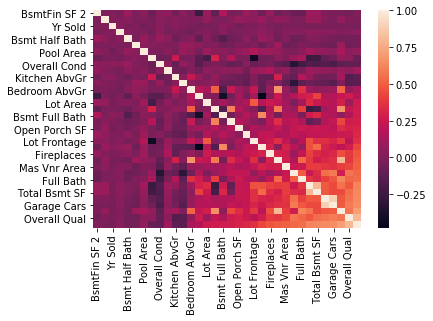

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = numerical_df[abs_corr_coeffs.index].corr()
sns.heatmap(corrmat)
plt.show()

In [ ]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")

def select_features(df_, coeff_threshold=0.4, debug=False):
    df = df_.copy()
    df_org_shape = df.shape
    

    
    
    
    if debug: print(f'We dropped {df_org_shape[1] - df.shape[1]} columns.')
    return df

In [ ]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df, debug=True)
filtered_df = select_features(transform_df, coeff_threshold=0.4, debug=True)
rmse = train_and_test(filtered_df, debug=True)

rmse

#### Categorical Features

In [134]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t") # object - katgorizacijski tip

In [135]:
df['Utilities'].value_counts()

AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64

In [136]:
df['Street'].value_counts()

Pave    2918
Grvl      12
Name: Street, dtype: int64

In [137]:
df['House Style'].value_counts()

1Story    1481
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

In [138]:
df['Utilities'] = df['Utilities'].astype('category')

In [139]:
df['Utilities'].head()

0    AllPub
1    AllPub
2    AllPub
3    AllPub
4    AllPub
Name: Utilities, dtype: category
Categories (3, object): [AllPub, NoSeWa, NoSewr]

In [140]:
df['Utilities'].cat.codes.head()

0    0
1    0
2    0
3    0
4    0
dtype: int8

In [141]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df, debug=False)
text_cols = transform_df.select_dtypes(include=['object']).columns

for col in text_cols:
    print(col+":", len(transform_df[col].unique()))
    
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')
    
transform_df['Utilities'].cat.codes.value_counts() # koliko je unique vrednosti

MS Zoning: 7
Street: 2
Alley: 3
Lot Shape: 4
Land Contour: 4
Utilities: 3
Lot Config: 5
Land Slope: 3
Neighborhood: 28
Condition 1: 9
Condition 2: 8
Bldg Type: 5
House Style: 8
Roof Style: 6
Roof Matl: 8
Exterior 1st: 16
Exterior 2nd: 17
Mas Vnr Type: 6
Exter Qual: 4
Exter Cond: 5
Foundation: 6
Bsmt Qual: 6
Bsmt Cond: 6
Bsmt Exposure: 5
BsmtFin Type 1: 7
BsmtFin Type 2: 7
Heating: 6
Heating QC: 5
Central Air: 2
Electrical: 6
Kitchen Qual: 5
Functional: 8
Fireplace Qu: 6
Garage Type: 7
Garage Finish: 4
Garage Qual: 6
Garage Cond: 6
Paved Drive: 3
Pool QC: 5
Fence: 5
Misc Feature: 6


0    2927
2       2
1       1
dtype: int64

#### Dummy Coding

In [144]:
pd.get_dummies(df['Utilities']).head() # pretvorba v več stolpcev

,AllPub,NoSeWa,NoSewr
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [145]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [147]:
## Which categorical columns have we still carried with us? We'll test tehse 
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)

In [148]:
transform_cat_cols

['MS SubClass',
 'MS Zoning',
 'Street',
 'Alley',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Heating',
 'Central Air',
 'Garage Type',
 'Misc Feature']

In [149]:
dummy_cols = pd.DataFrame()
for col in transform_cat_cols:
    col_dummies = pd.get_dummies(transform_df[col])
    transform_df = pd.concat([transform_df, col_dummies] ,axis=1)
    del transform_df[col]

In [150]:
transform_df.shape

(2930, 225)

In [151]:
transform_df.head()

,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,...,Attchd,Basment,BuiltIn,CarPort,Detchd,Elev,Gar2,Othr,Shed,TenC
0,141.0,31770,IR1,AllPub,Gtl,6,5,112.0,TA,TA,...,1,0,0,0,0,0,0,0,0,0
1,80.0,11622,Reg,AllPub,Gtl,5,6,0.0,TA,TA,...,1,0,0,0,0,0,0,0,0,0
2,81.0,14267,IR1,AllPub,Gtl,6,6,108.0,TA,TA,...,1,0,0,0,0,0,1,0,0,0
3,93.0,11160,Reg,AllPub,Gtl,7,5,0.0,Gd,TA,...,1,0,0,0,0,0,0,0,0,0
4,74.0,13830,IR1,AllPub,Gtl,5,5,0.0,TA,TA,...,1,0,0,0,0,0,0,0,0,0


In [152]:
transform_df.dtypes.value_counts()

uint8       171
int64        22
float64      11
category      8
category      2
category      2
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
dtype: int64

In [153]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [154]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df, debug=False)

In [158]:
## Which categorical columns have we still carried with us? We'll test tehse 
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)

## How many unique values in each categorical column?
uniqueness_counts = transform_df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()

## Aribtrary cutoff of 10 unique values (worth experimenting)
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
transform_df = transform_df.drop(drop_nonuniq_cols, axis=1)

In [159]:
drop_nonuniq_cols

Index([], dtype='object')

In [ ]:
## Select just the remaining text columns and convert to categorical
text_cols = transform_df.select_dtypes(include=['object'])
for col in text_cols:
    transform_df[col] = 
    
## Create dummy columns and add back to the dataframe!
transform_df = pd.concat([
    transform_df, 
    pd.get_dummies(transform_df.select_dtypes(include=['category']))
], axis=1).drop(text_cols,axis=1)

In [ ]:
transform_df.dtypes.value_counts()

Update select_features()

In [ ]:
def select_features(df_, coeff_threshold=0.4, uniq_threshold=10, debug=False):
    df = df_.copy()
    df_org_shape = df.shape
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    if debug: print(f'We dropped {df_org_shape[1] - df.shape[1]} columns.')
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = 
    drop_nonuniq_cols = 
    df = 
    
    text_cols = df.select_dtypes(include=['object'])

    
    return df

In [ ]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df, coeff_threshold=0.4, uniq_threshold=10,debug=False)
rmse = train_and_test(filtered_df)

rmse

### Train And Test

In [160]:
def train_and_test(df, k=0, debug=False):  
    train = df[:1460]
    test = df[1460:]
    
    ## You can use `pd.DataFrame.select_dtypes()` to specify column types
    ## and return only those columns as a data frame.
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    ## You can use `pd.Series.drop()` to drop a value.
    features = numeric_train.columns.drop("SalePrice")
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

- When k equals 0, perform holdout validation (what we already implemented):
    - Select the first 1460 rows and assign to train.
    - Select the remaining rows and assign to test.
    - Train on train and test on test.
    - Compute the RMSE and return.

In [2]:
def train_and_test(df, k=0, debug=False):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    if k == 0:
        train = df[:1460]
        test = df[:1460]
        
        
    

- When k equals 1, perform simple cross validation:
    - Shuffle the ordering of the rows in the data frame.
    - Select the first 1460 rows and assign to fold_one.
    - Select the remaining rows and assign to fold_two.
    - Train on fold_one and test on fold_two.
    - Train on fold_two and test on fold_one.
    - Compute the average RMSE and return.

In [ ]:
def train_and_test(df, k=0, debug=False):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
   






        print(rmse_one)
        print(rmse_two)
        return avg_rmse

- When k is greater than 1, implement k-fold cross validation using k folds:
    - Perform k-fold cross validation using k folds.
    - Calculate the average RMSE value and return this value.

In [3]:
def train_and_test(df, k=0, debug=False):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        if debug: print(rmse_one)
        if debug: print(rmse_two)
        return avg_rmse
    
    else:
       
    
    
    
    
    
    
        return avg_rmse

### Using the model

In [ ]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4)

rmse

#### Testing different thresholds

In [ ]:
# coeff_threshold
coeff_threshold_params = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7]
rmse_values = list()

df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)



In [ ]:
rmse_values

In [ ]:
plt.scatter(x=coeff_threshold_params, y=rmse_values)
plt.show() # 0.1 in 0.4 najboljše vrednosti

In [ ]:
# uniq_threshold
uniq_threshold_params = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
rmse_values = list()

df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)



In [ ]:
rmse_values

In [ ]:
plt.scatter(x=uniq_threshold_params, y=rmse_values)
plt.show()

In [ ]:
# optimiziran model
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df, coeff_threshold=0.1, uniq_threshold=5,debug=False)
rmse = train_and_test(filtered_df, k=4)
rmse